In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

In [2]:
#Loding dataset from uci website and createing data frame using the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [3]:
#dataset
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [5]:
#data set shape
df.shape

(699, 11)

In [6]:
#df.drop(['id'],axis=1,inplace = True)

In [7]:
# Columns in the dataset
df.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [8]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
#there is no missing value in this data set
#but there is incosintence data in  bare_nuclei   column

In [10]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [11]:
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [12]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [13]:
df[df['bare_nuclei'] == '?'].sum()

id                                13721250
clump_thickness                         54
uniform_cell_size                       39
uniform_cell_shape                      46
marginal_adhesion                       29
single_epithelial_size                  39
bare_nuclei               ????????????????
bland_chromatin                         50
normal_nucleoli                         44
mitoses                                 16
class                                   36
dtype: object

In [14]:

df.replace('?',np.NaN,inplace=True)


In [15]:
df['bare_nuclei'].info()
df['bare_nuclei'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 699 entries, 0 to 698
Series name: bare_nuclei
Non-Null Count  Dtype 
--------------  ----- 
683 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [16]:
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [17]:
df=df.fillna(402)

In [18]:
df.isna().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [19]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', 402, '5', '8', '6'],
      dtype=object)

In [20]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      699 non-null    int64
 1   clump_thickness         699 non-null    int64
 2   uniform_cell_size       699 non-null    int64
 3   uniform_cell_shape      699 non-null    int64
 4   marginal_adhesion       699 non-null    int64
 5   single_epithelial_size  699 non-null    int64
 6   bare_nuclei             699 non-null    int64
 7   bland_chromatin         699 non-null    int64
 8   normal_nucleoli         699 non-null    int64
 9   mitoses                 699 non-null    int64
 10  class                   699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [22]:
df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,12.665236,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,59.741272,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,402.000000,10.000000,10.000000,10.000000,4.000000


<AxesSubplot: >

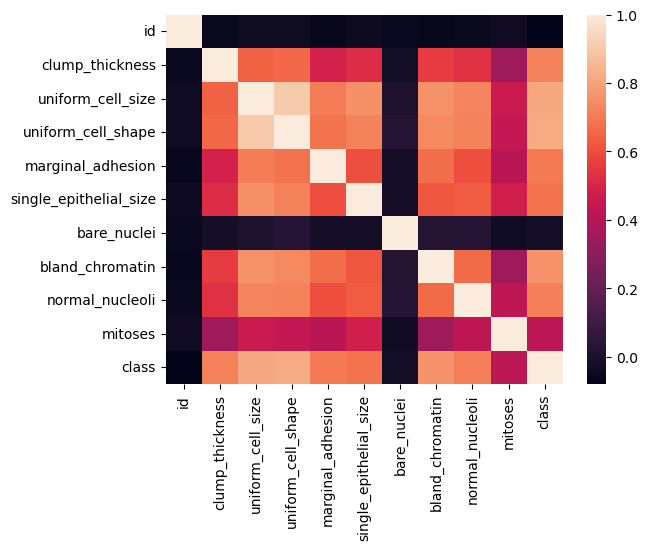

In [23]:
sns.heatmap(df.corr())

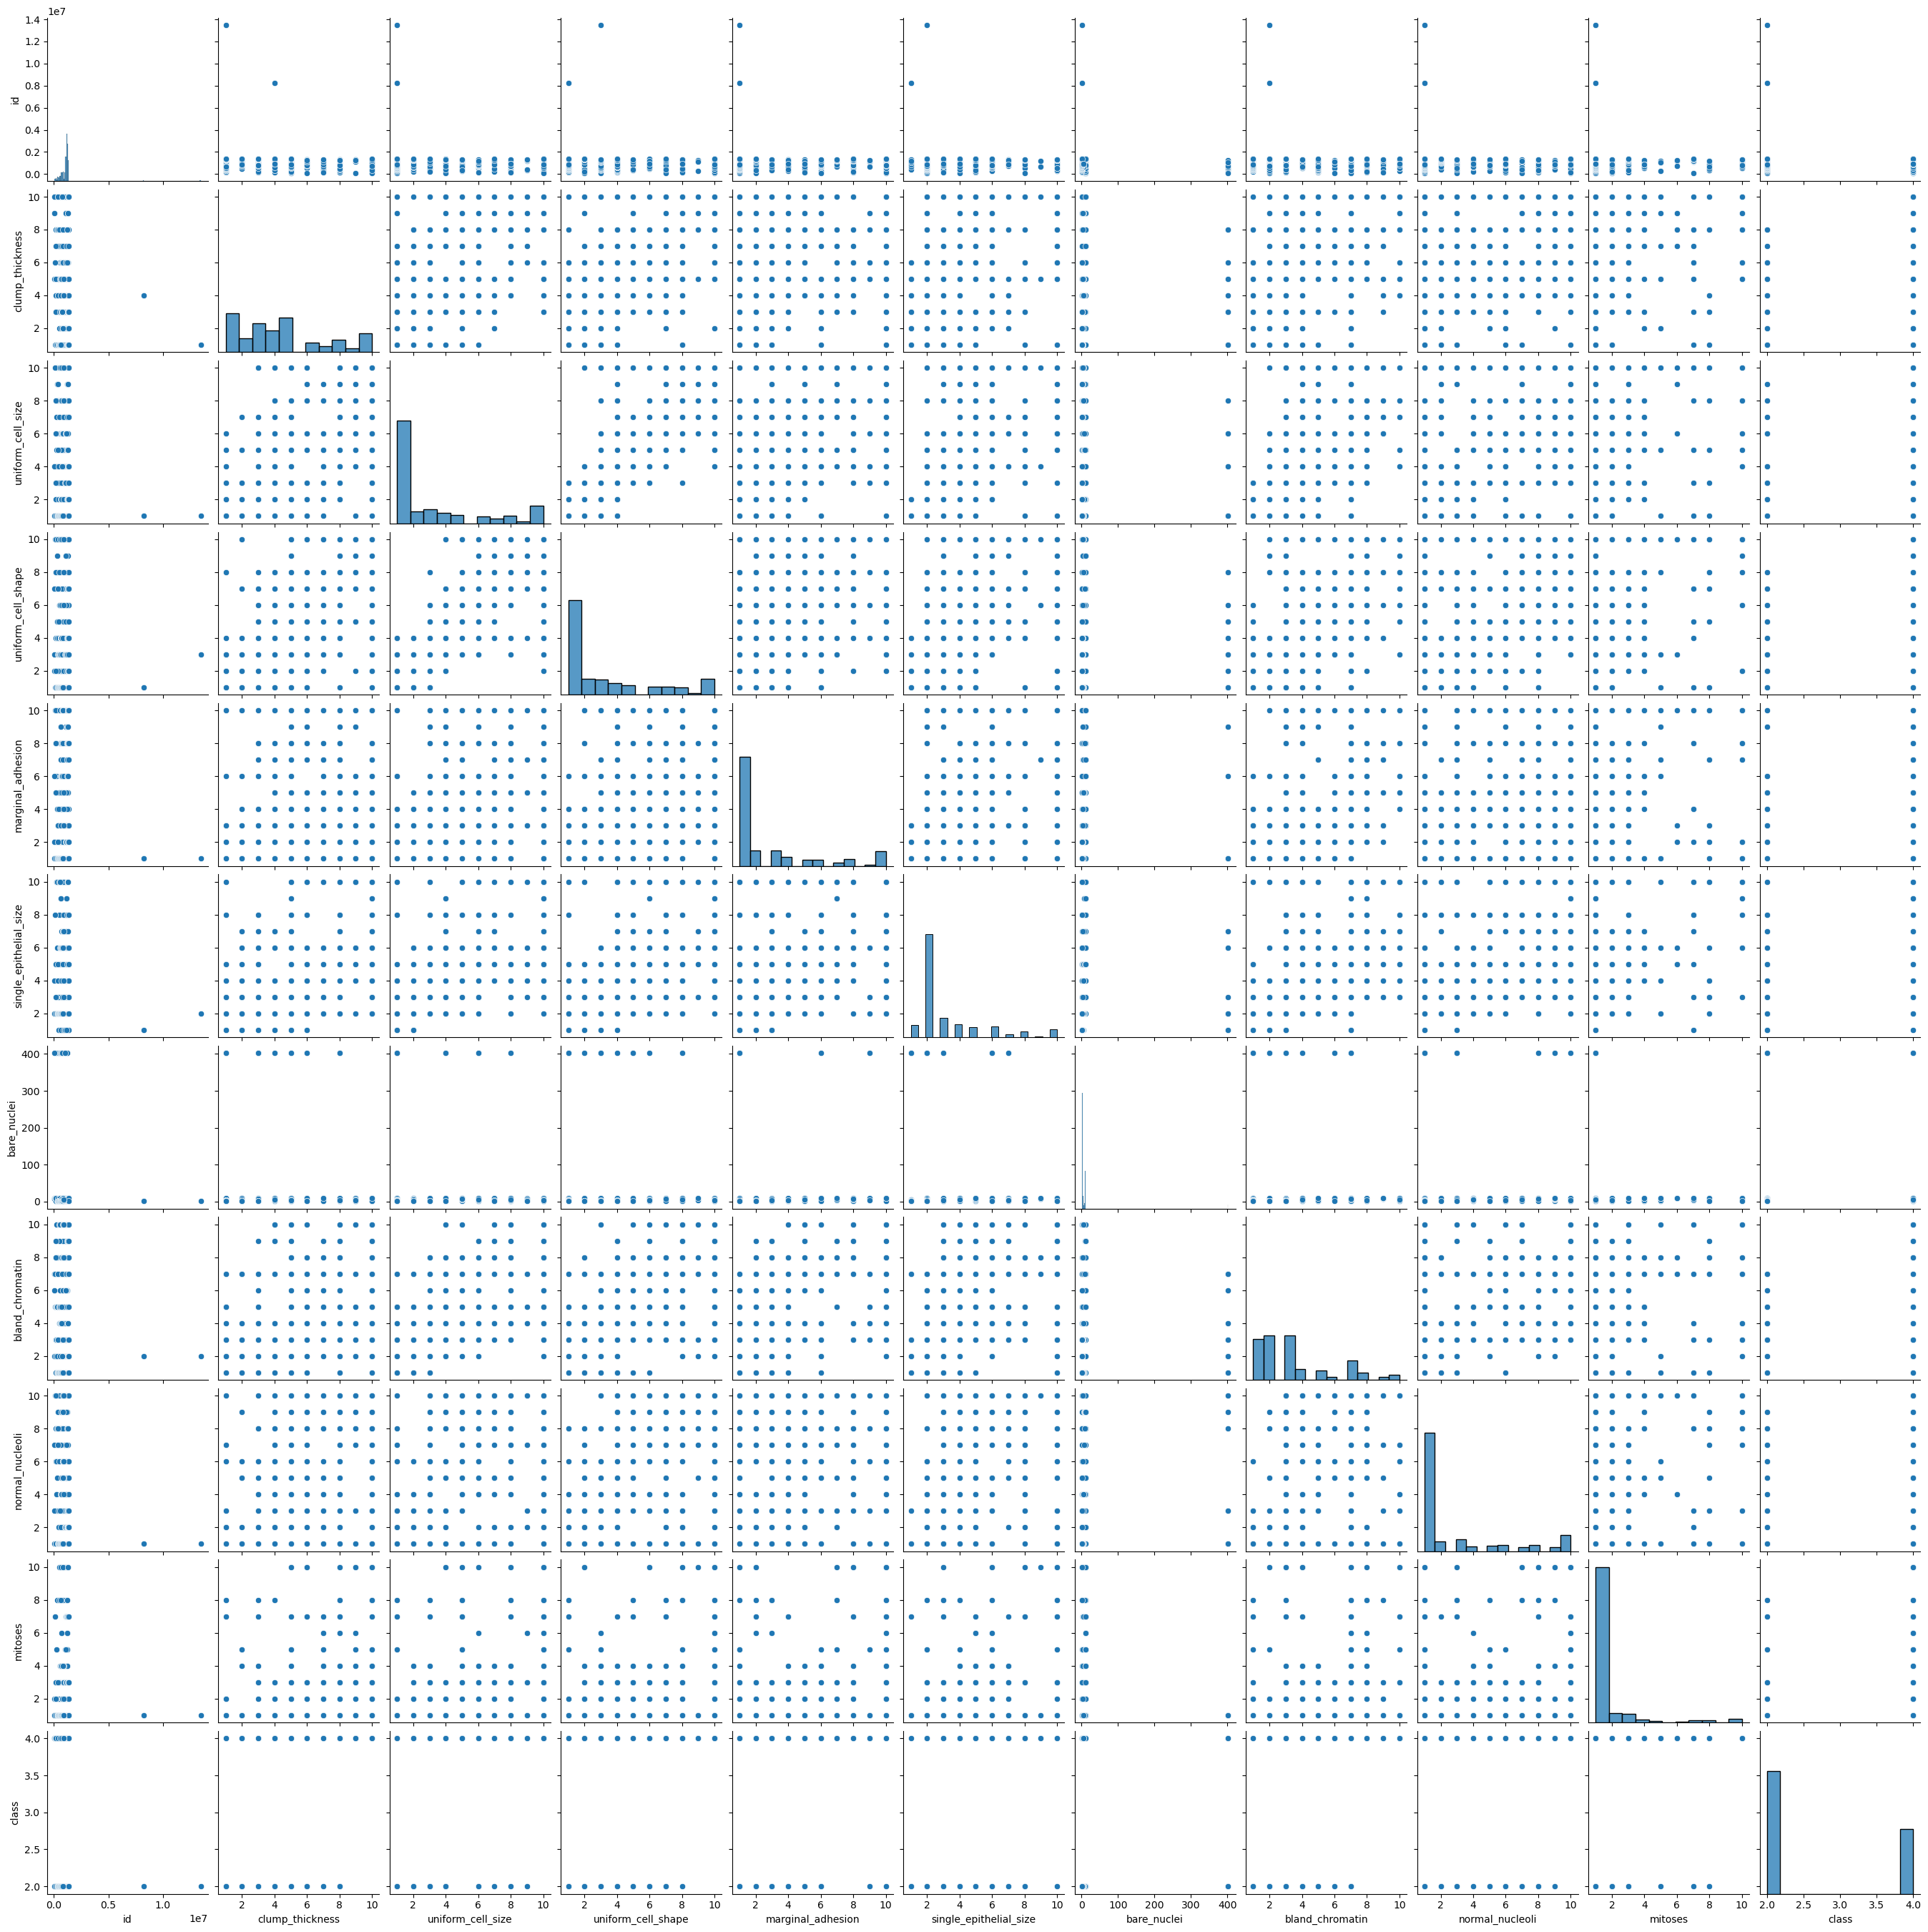

In [24]:
sns.pairplot(df)

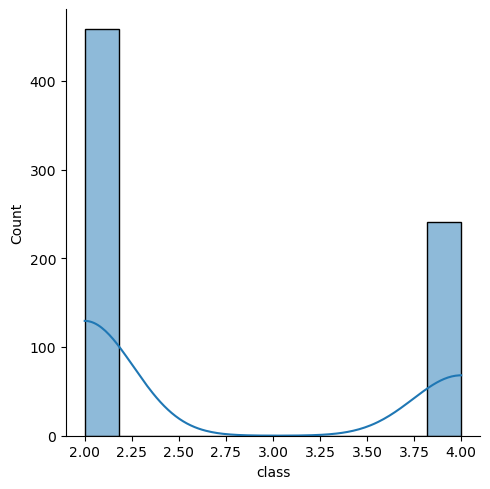

In [25]:
sns.displot(df['class'],kde=True)

## Multivariate Data Analysis

<AxesSubplot: >

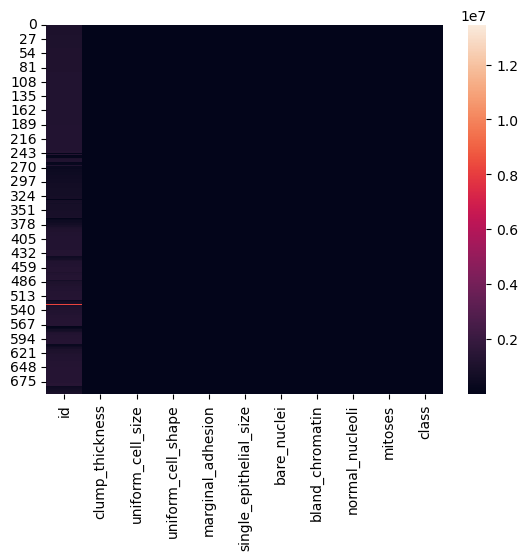

In [26]:
sns.heatmap(df)

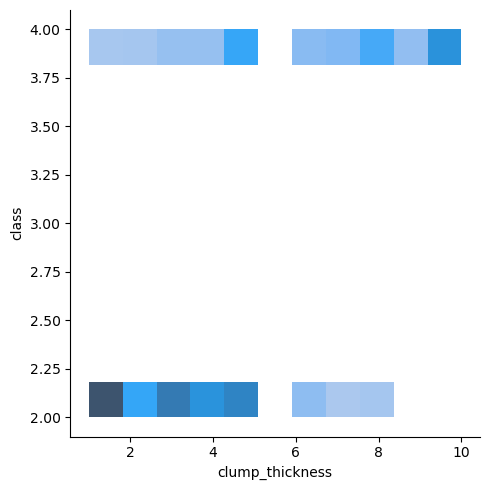

In [27]:
sns.displot(data=df, x="clump_thickness", y="class")

<AxesSubplot: >

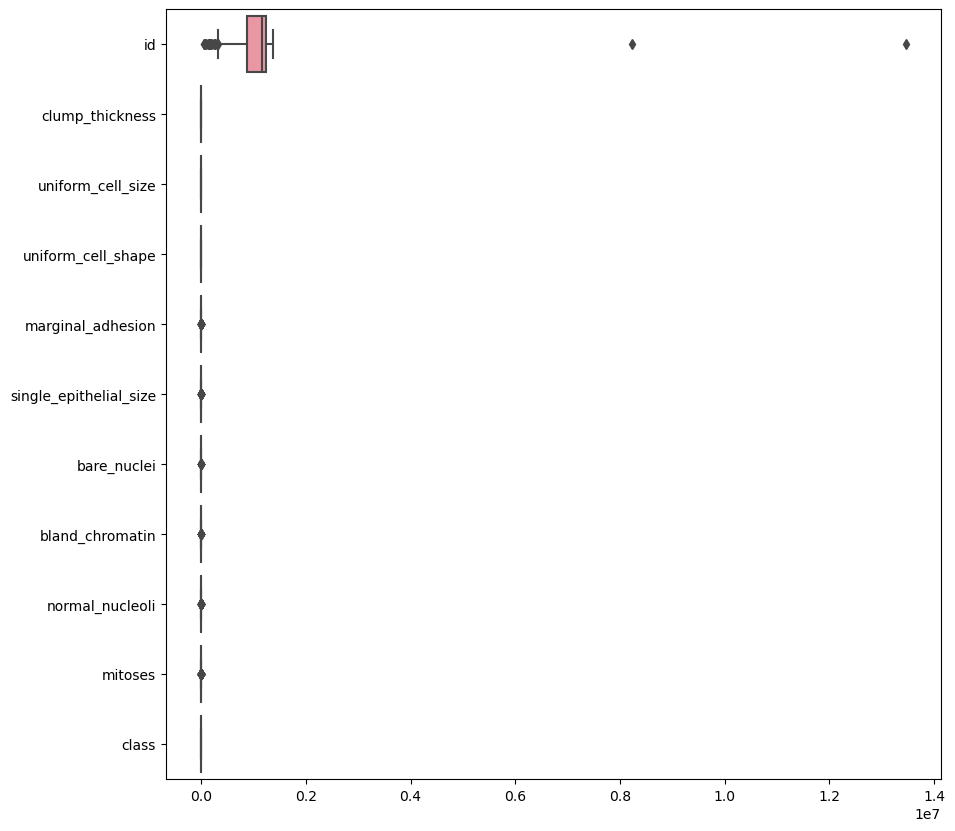

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature selection

In [29]:
#Correlation with output variable
cor=df.corr()
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

id                        0.080226
clump_thickness           0.716001
uniform_cell_size         0.817904
uniform_cell_shape        0.818934
marginal_adhesion         0.696800
single_epithelial_size    0.682785
bare_nuclei               0.021444
bland_chromatin           0.756616
normal_nucleoli           0.712244
mitoses                   0.423170
class                     1.000000
Name: class, dtype: float64

In [30]:
df=df.drop('id',axis=1)

## Train and Test Model

In [48]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = df['class']
X = df.drop('class', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [32]:
# Testing Options
scoring = 'accuracy'

In [35]:
# Define models to train
models= []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))


# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For DTC Model:Mean accuracy is 0.955017 (Std accuracy is 0.015251)
For SVM Model:Mean accuracy is 0.969388 (Std accuracy is 0.024575)
For NB Model:Mean accuracy is 0.967347 (Std accuracy is 0.027683)
For KNN Model:Mean accuracy is 0.975510 (Std accuracy is 0.017791)


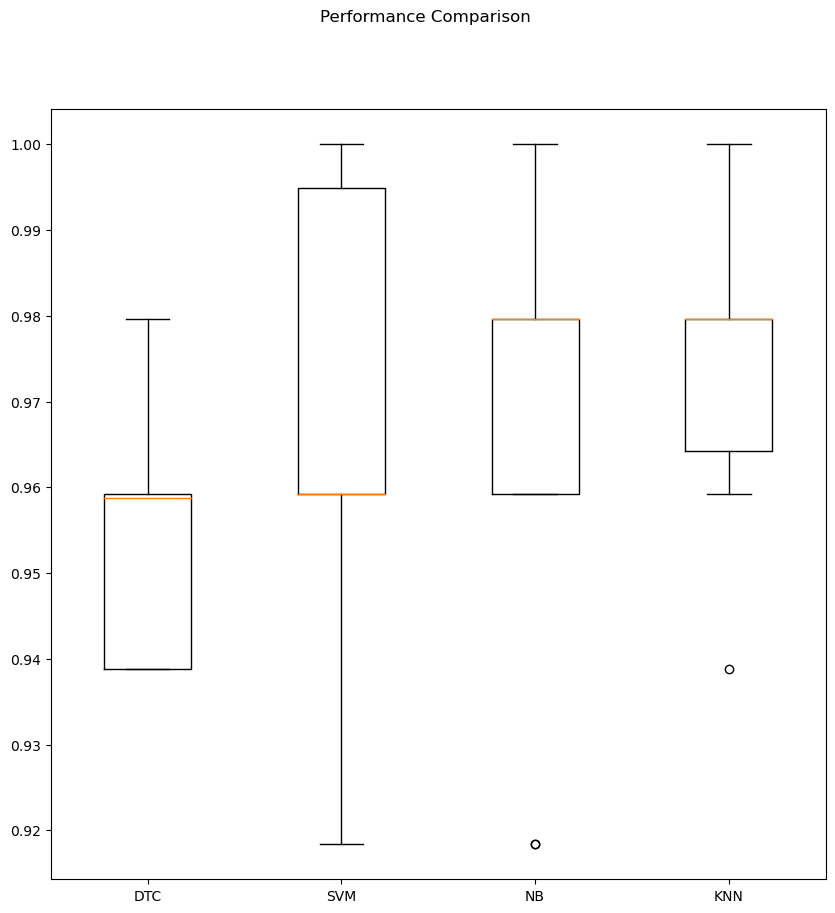

In [36]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

CART, SVM, GaussianNB and KNN  performed the best with  above 95% mean accuracy


Model: DTC
Accuracy score: 0.919047619047619
Classification report:
               precision    recall  f1-score   support

           2       0.91      0.97      0.94       133
           4       0.94      0.83      0.88        77

    accuracy                           0.92       210
   macro avg       0.92      0.90      0.91       210
weighted avg       0.92      0.92      0.92       210



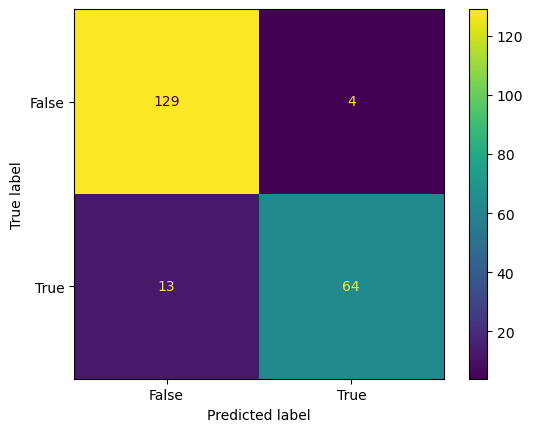


Model: SVM
Accuracy score: 0.9380952380952381
Classification report:
               precision    recall  f1-score   support

           2       0.92      0.98      0.95       133
           4       0.97      0.86      0.91        77

    accuracy                           0.94       210
   macro avg       0.95      0.92      0.93       210
weighted avg       0.94      0.94      0.94       210



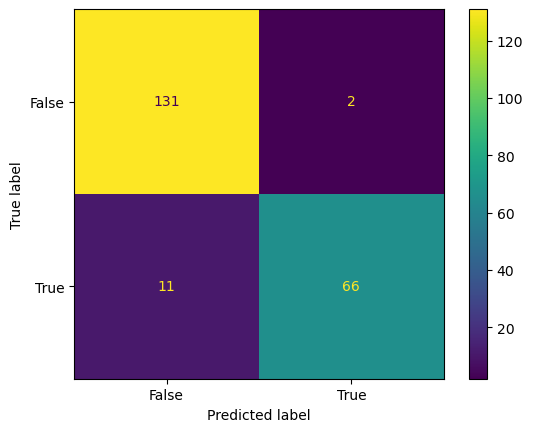


Model: NB
Accuracy score: 0.9428571428571428
Classification report:
               precision    recall  f1-score   support

           2       0.95      0.95      0.95       133
           4       0.92      0.92      0.92        77

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



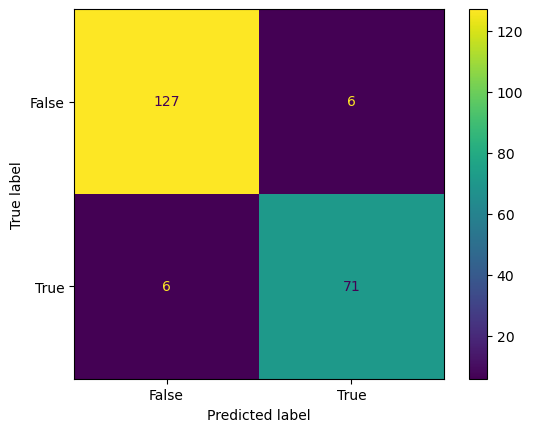


Model: KNN
Accuracy score: 0.9476190476190476
Classification report:
               precision    recall  f1-score   support

           2       0.95      0.97      0.96       133
           4       0.95      0.91      0.93        77

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



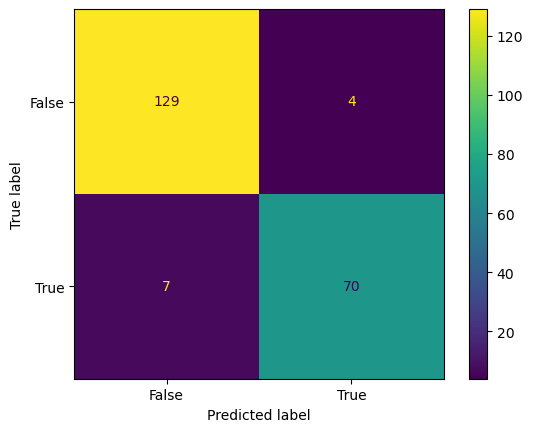

In [38]:
#from IPython import display
from IPython.core.display import display,  HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Make predictions on validation dataset
from sklearn import metrics

for name, model in models:
    model= model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    
    ypredict=model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(Y_test, ypredict)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    


## Support Vector Machine

In [39]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)


Test Accuracy: 0.9380952380952381


In [52]:
example_measures = [[4,2,1,1,1,2,3,2,1]]
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [ ]:
df[df['class']==4]

In [43]:
import pickle

In [45]:
pickle.dump(KNeighborsClassifier, open('KNN_model.pickle', 'wb'))
 

In [53]:
pickle.dump(clf, open('svm_model.pickle', 'wb'))

In [49]:
X_train.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
413,5,1,2,1,2,1,3,1,1
664,3,1,1,3,2,1,2,1,1
608,5,10,10,10,10,10,10,1,1
340,10,3,3,1,2,10,7,6,1
255,5,6,6,2,4,10,3,6,1
